# Часть I: О теореме Байеса

### Ответ на 1 вопрос:

Прокурор оценивает вероятность редкой группы крови у подсудимого, если бы он был не виновен, в 1%, данная оценка не совсем корректна, т.к. он не учитывает условие невиновности, необходимо подсчитать условную вероятность редкой группы крови при условии невиновности, для этого воспользуемся теоремой Байеса: 

$$ P(rare\:blood\:type|innocence) = \frac{P(innocence|rare\:blood\:type) * P(rare\:blood\:type)}{P(innocence)} = \frac{\frac{0.01*Q-1}{0.01*Q}*0.01}{(1 - 1/Q)} = \frac{(Q - 100)}{100 * (Q - 1)} $$

где: 

- **Q** - численность населения города 

- $P(rare\:blood\:type|innocence)$ - вероятность редкой группы крови при условии невиновности

- $P(innocence|rare\:blood\:type)$ - вероятность невиновности при условии редкой группы крови

- $P(rare\:blood\:type)$ - вероятность редкой группы крови

- $P(innocence)$ - вероятность невиновности

что близко к 1%  при большом Q, но все же равенство не достигается. Будем считать данную оценку вероятности условно корректной. Следующий переход в рассуждениях - "если вероятность P(редкая группа крови|невиновность) = 1%, значит, с вероятностью 99% он виновен..." в корне не верен, т.к. 99% это не вероятность виновности при условии редкой группы крови, а верояность имения НЕ редкой группы крови при условии не виновности, P(НЕ редкая группа крови|невиновность) = 100% - P(редкая группа крови|невиновность) = 99%. Подсчет P(виновности|редкая группа крови) приведен в ответе на второй вопрос.

### Ответ на 2 вопрос:

По мнению адвоката: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь - это то, что подсудимый совершил убийство с вероятностью 0.01%”.
Адвокат оценил вероятность виновности подсудимого, как если бы подсудимый стал подсудимым в результате абсолютно случайной выборки одного человека из Q (Q - численность населения города). Но так обычно не происходит. Чтобы оценить P(виновности|редкой группы крови) воспользуемся теоремой Байеса:

$$ P(guilt|rare\:blood\:type) = \frac{P(rare\:blood\:type|guilt) * P(guilt)}{P(rare\:blood\:type)} =  \frac{P(rare\:blood\:type|guilt) * P(guilt)}{1 * P(guilt) + 0.01 * (1 - P(guilt))} $$

- $ P(rare\:blood\:type|guilt) = 1 $;

- $ P(guilt) $ - НАМ НЕ ИЗВЕСТНА. Об этой вероятности нужно сказать пару слов, если бы подсудимый стал подсудимым в результате абсолютно случайной выборки одного человека из Q, данная вероятность была бы равна 1/Q, но так как в жизни так не происходит данная вероятность на самом деле нам не известна. В качестве пояснения можно привести следующий пример: предположим, что всего было 10 равновероятных подозреваемых, например люди, которые присутствовали во время убийства в непосредственной близости и имели возможность совершить приступление (при этом совершить преступление могли только они), на основании данных камер наблюдения, тогда $ P(guilt) $  = 0.1;

- $ P(rare\:blood\:type) = P(rare\:blood\:type|guilt) * P(guilt) + P(rare\:blood\:type|innocence) * P(innocence) $;

Построим график:

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [92]:
P_guilt = np.arange(0, 1, 0.01)
def P_guilt_rbt(P_guilt):
    return P_guilt / (P_guilt + 0.01 * (1 - P_guilt))

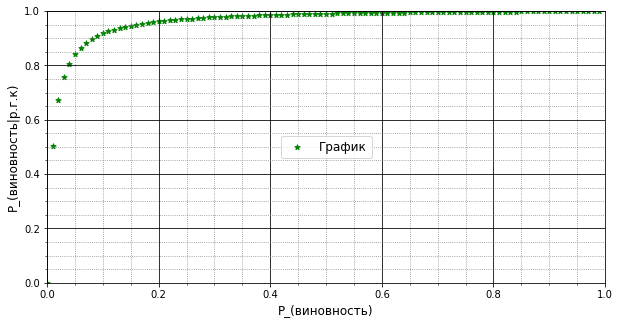

In [101]:
figsize = (10,5)
legend_fontsize = 12
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

ax.grid(which='major', color = 'k')
ax.grid(which='minor',
        color = 'gray',
        linestyle = ':')
ax.minorticks_on()
ax.set_xlim(0, 1)
ax.set_ylim((0, 1))
ax.scatter(P_guilt, P_guilt_rbt(P_guilt), marker='*', s=30, linewidth=1,\
           label="График", color="green")
ax.set_xlabel("P_(виновность)", fontsize=12)
ax.set_ylabel("P_(виновность|р.г.к)", fontsize=12)
ax.legend(loc="center", fontsize=legend_fontsize)
plt.show()

### Задание

Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


In [233]:
def p_d_if_positive_test(false_positive, false_negative):
    return (1 - false_negative) * 0.01 / ((1 - false_negative) * 0.01 + false_positive * 0.99)   

def p_d_if_negative_test(false_positive, false_negative):
    return false_negative * 0.01 / (false_negative * 0.01 + (1 - false_positive) * 0.99)

In [234]:
# Вероятность болезни
p_d = 0.01
p_h = 1 - p_d
false_positive = 0.05
false_negative = 0.05

In [235]:
p_d_if_positive_test(false_positive, false_negative) 

0.16101694915254236

In [236]:
p_d_if_negative_test(false_positive, false_negative)

0.0005313496280552604

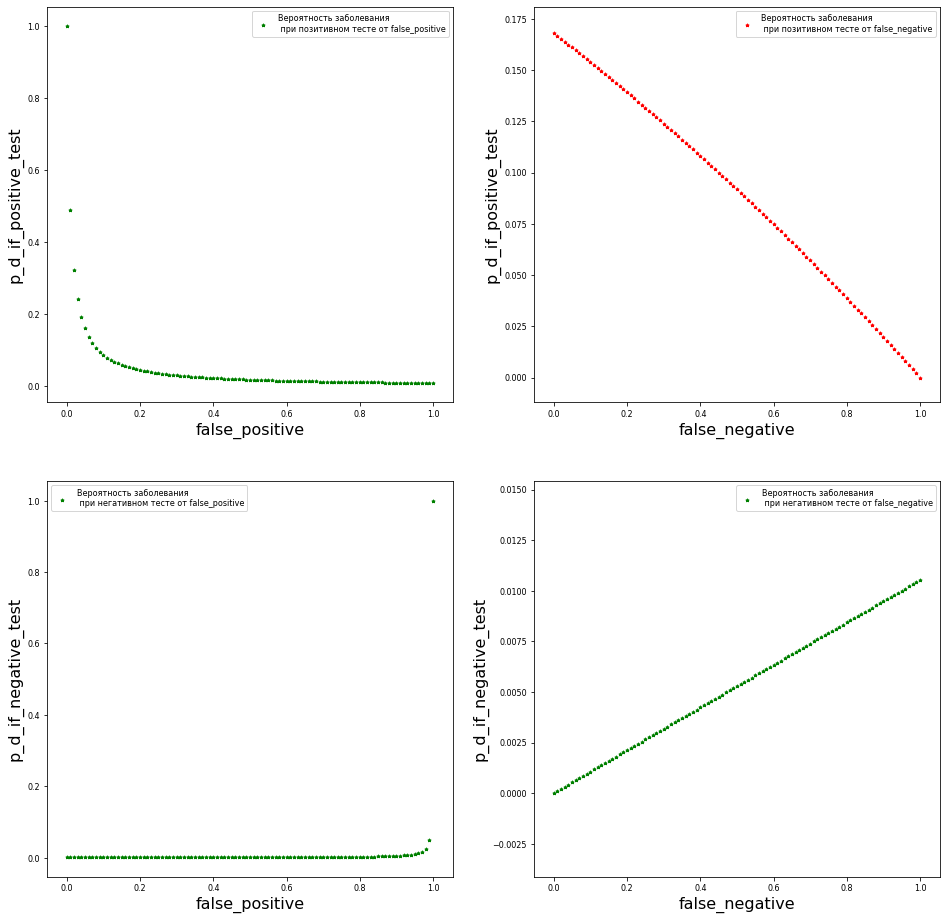

In [242]:
title_fontsize = 16
axis_fontsize = 16

fig , ax = plt.subplots(nrows = 2, ncols = 2, figsize=(16,16))

false_positive = np.arange(0, 1.01, 0.01)
false_negative = 0.05

#Plotting on the 1st axes
ax[0][0].scatter(false_positive, p_d_if_positive_test(false_positive, false_negative), marker='*',\
                 s=10, color="green", label="Вероятность заболевания\n при позитивном тесте от false_positive")
ax[0][0].set_xlabel('false_positive', fontsize=axis_fontsize)
ax[0][0].set_ylabel('p_d_if_positive_test', fontsize=axis_fontsize)

ax[0][0].legend()

false_negative = np.arange(0, 1.01, 0.01)
false_positive = 0.05

#Plotting on the 2nd axes
ax[0][1].scatter(false_negative, p_d_if_positive_test(false_positive, false_negative), marker='*',\
                 s=10, linewidth=1, color="red", label='Вероятность заболевания\n при позитивном тесте от false_negative')
ax[0][1].set_xlabel('false_negative', fontsize=axis_fontsize)
ax[0][1].set_ylabel('p_d_if_positive_test', fontsize=axis_fontsize)
ax[0][1].legend()

#Plotting on the 3rd axes
false_positive = np.arange(0, 1.01, 0.01)
false_negative = 0.05

ax[1][0].scatter(false_positive, p_d_if_negative_test(false_positive, false_negative), marker='*',\
                 s=10, color="green", label="Вероятность заболевания\n при негативном тесте от false_positive")
ax[1][0].set_xlabel('false_positive', fontsize=axis_fontsize)
ax[1][0].set_ylabel('p_d_if_negative_test', fontsize=axis_fontsize)
ax[1][0].legend()

#Plotting on the 4th axes
false_negative = np.arange(0, 1.01, 0.01)
false_positive = 0.05

ax[1][1].scatter(false_negative, p_d_if_negative_test(false_positive, false_negative), marker='*',\
                 s=10, color="green", label="Вероятность заболевания\n при негативном тесте от false_negative")
ax[1][1].set_xlabel('false_negative', fontsize=axis_fontsize)
ax[1][1].set_ylabel('p_d_if_negative_test', fontsize=axis_fontsize)
ax[1][1].legend()

plt.show()

# Часть II: О линейной регрессии